### Image Mask Manipulation
Exported image masks from [ilastik](https://www.ilastik.org/) can be mapped together in python:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

In [3]:
# read in binary .npy export from ilastik
seg = np.load('test_Simple Segmentation.npy')
seg.shape

(1531, 1797, 1)

In [17]:
# values are 1 and 2, for the two labels trained in ilastik
print('Unique values in mask file: ' + str(np.unique(seg)))

Unique values in mask file: [1 2]


In [18]:
# first two dimensions are in pixels. third dimension needs to be 'squeezed' for manipulation in 2D
np.squeeze(seg)

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

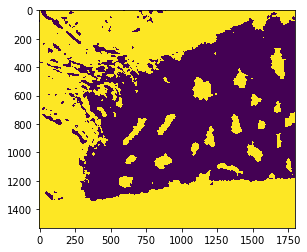

In [19]:
plt.imshow(np.squeeze(seg))

---

In [20]:
# now read in probabilities output from ilastik
prob = np.load('test_Probabilities.npy')
prob.shape

(1531, 1797, 2)

In [21]:
# values are fractional probabilities
print('Unique values in probabilities file: ' + str(np.unique(prob)))

Unique values in mask file: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [26]:
# first two dimensions are in pixels. 
# third dimension contains probabilities for label 1 and inverse probabilities for label 2
print('probabilities for label 1: ' + str(prob[:,:,0]))
print('probabilities for label 2: ' + str(prob[:,:,1]))

probabilities for label 1: [[0.24 0.19 0.13 ... 0.   0.   0.  ]
 [0.23 0.19 0.13 ... 0.   0.   0.  ]
 [0.21 0.19 0.17 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
probabilities for label 2: [[0.76 0.81 0.87 ... 1.   1.   1.  ]
 [0.77 0.81 0.87 ... 1.   1.   1.  ]
 [0.79 0.81 0.83 ... 1.   1.   1.  ]
 ...
 [1.   1.   1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]]


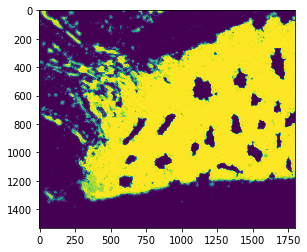

In [29]:
plt.imshow(prob[:,:,0])

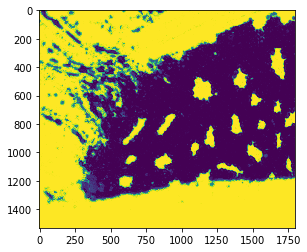

In [30]:
plt.imshow(prob[:,:,1])